In [151]:
import numpy as np
from matplotlib import pyplot as plt

In [156]:
def numerov(psi_range,x_range,V,E,direction):
    """psi_range = array contenant les psi_i avec les valeurs aux bords déjà mises en place 
    x_range = array contenant les x
    V = fonction jouant le role de potentiel
    E = energie à tester
    direction -> 1 = gauche/droite  -1=droite/gauche"""
    
    #création de variables utiles
    Q = lambda x : 2*(E-V(x))
    h = x_range[1]-x_range[0]  
    psi_out = psi_range.copy()
    
    #réalisation de l'intégration de Numerov
    if direction == 1 :
        for i in range(2,len(psi_range)):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i-1]))*psi_out[i-1]-(1+1/12*h**2*Q(x_range[i-2]))*psi_out[i-2])/(1+1/12*h**2*Q(x_range[i]))
    if direction == -1 :
        for i in range(len(psi_range)-3,-1,-1):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i+1]))*psi_out[i+1]-(1+1/12*h**2*Q(x_range[i+2]))*psi_out[i+2])/(1+1/12*h**2*Q(x_range[i]))
    
    return psi_out

V_0 = 5
x0=1
a = 2
a1=1
a2=0.9
def V1(x):
        return -V_0/2*(1-np.sign(np.abs(x)-a))
def V2(x):
        return V_0*(x/a)**2
def V3(x):
        return 4*V_0*( ((a1/2**(1/6))/x)**12-((a1/2**(1/6))/x)**6 )
def V4(x):
        return V_0*((1-np.exp(-a*(x-x0)))**2)
def Box(x):
    return 100*(V_0-V_0/2*(1-np.sign(np.abs(x)-a)))
def integrale(F,X):
    sum=0
    for i in range (0,len(F)-1):
        sum+=(X[i+1]-X[i])*F[i]
    return sum

In [213]:
def dichotomie (V,x_range,Nb_passage,It_passage,zoom,E_min,dE,eps):
    """
    V=potentiel
    Nb_passage=nombre de passage effectuées
    It_passage=nombre d'iterations effectuées à chaque passage (doit être > 4)
    zoom=valeur de l'augmentation de precision entre chaque passage
    E_min=valeur de depart de recherche de l'energie
    dE=pas de depart de l'energie
    """
    affiche=input("Afficher les solutions intermédiaires ? (y/n)")
    

    eps=dx*10**(-5)
    psi_zero=np.zeros(len(x_range))
    precision=1
    for passage in range(0,Nb_passage):
        E=E_min 
        Z_last=[] # contient la dernière valeur de chaque fonction d'onde (en log)

        #remise à 0 de la fonction d'onde
        psi_range = psi_zero
        psi_range[0] = 0
        psi_range[1] = eps

        out=numerov(psi_range,x_range,V,E-2*dE,1)# -2*dE pour ne pas louper la valeur si elle est trouvée à la 1ere iteration et pour generer 2 valeurs
        Z_last.append(np.log(abs(out[-1])))
        out=numerov(psi_range,x_range,V,E-dE,1)
        Z_last.append(np.log(abs(out[-1])))

        for it in range(0,It_passage):
            #remise à 0 de la fonction d'onde
            psi_range = psi_zero
            psi_range[0] = 0
            psi_range[1] = eps

            out=numerov(psi_range,x_range,V,E,1)
            Z_last.append(np.log(abs(out[-1])))
            #print(out)
            #print(E,"  ",E_min,"  ",Z_last[-2],"  ")
            E+=dE
        #print( "\n ",Z_last[np.argmin(Z_last) ])
        E_min+=np.argmin(Z_last)*dE-3*dE
        if affiche=="y":
            print("Passage",passage+1,": ",E_min," Precision: ",precision)
        dE=dE/zoom
        precision/=zoom

(-6.0, 10.0)

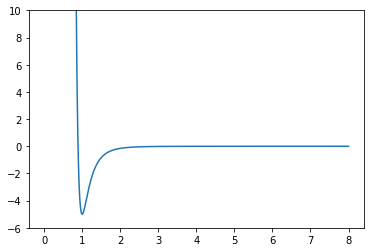

In [260]:
#CONTIENT LA PLAGE DES VALEURS DE X UTILES,LA VALEUR DE LA PREMIERE DERIVEE EN x_m, ET LE POTENTIEL. TRACE LE POTENTIEL.
V=V3 #potentiel utilisé
x_m=0.001
x_M=8
dx=5*10**(-3)
eps=dx*10**(-5)
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
plt.plot(x_range,V(x_range))
#plt.yscale('log')
plt.ylim(-6,10)

[-0.09519319319319308]

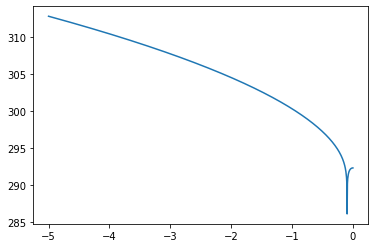

In [262]:
#CONTIENT LES BORNES ET LE PAS DES ENERGIES A TESTER. TRACE LA DIVERGENCE DE LA FONCTION D'ONDE EN x_M EN FONCTION DE L'ENERGIE. SORT LES MINIMAS LOCAUX DU ln DE CETTE DIVERGENCE.
E_min=-5
E_max=-0.0001
dE=0.005
N_E=int((E_max-E_min)/dE+1)
E_range=np.linspace(E_min,E_max,N_E)
I=[]
Y_last=[]
Z_last=[]
for E in E_range:
    psi_range = np.zeros(len(x_range))
    psi_range[0] = 0
    psi_range[1] = eps
    out=numerov(psi_range,x_range,V,E,1)
    Y_last.append(abs(out[-1]))
    Z_last.append(np.log(abs(out[-1])))
    #if Y_last[-1]<5*10**-6:
        #plt.plot(x_range,out)
        #print(E)
#plt.plot(E_range,np.abs(Y_last))
plt.plot(E_range,Z_last)
E_value=[]
for i in range (1,N_E-1):
    if Z_last[i]<Z_last[i+1] and Z_last[i]<Z_last[i-1]:
        E_value.append(E_range[i])
E_value

In [265]:
#CONTIENT LES VALEURS NECCESSAIRE A LA DICHOTOMIE. EFFECTUE LE CALCUL ADEQUAT
Nb_passage=20 #nombre de passage effectuées
It_passage=50 #nombre d'iterations effectuées à chaque passage (doit être > 4)
zoom=1.5 # valeur de l'augmentation de precision entre chaque passage
E_min=-1 #valeur de depart de recherche de l'energie
dE=0.01 #pas de depart de l'energie
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
dichotomie(V,x_range,Nb_passage,It_passage,zoom,E_min,dE,eps)

Afficher les solutions intermédiaires ? (y/n) y


Passage 1 :  -0.52  Precision:  1
Passage 2 :  -0.2  Precision:  0.6666666666666666
Passage 3 :  -0.0977777777777778  Precision:  0.4444444444444444
Passage 4 :  -0.0977777777777778  Precision:  0.2962962962962963
Passage 5 :  -0.0977777777777778  Precision:  0.19753086419753085
Passage 6 :  -0.09646090534979426  Precision:  0.1316872427983539
Passage 7 :  -0.09558299039780524  Precision:  0.0877914951989026
Passage 8 :  -0.09558299039780524  Precision:  0.05852766346593507
Passage 9 :  -0.09558299039780524  Precision:  0.03901844231062338
Passage 10 :  -0.09532286744906775  Precision:  0.026012294873748922
Passage 11 :  -0.09532286744906775  Precision:  0.017341529915832616
Passage 12 :  -0.09520725724962886  Precision:  0.01156101994388841
Passage 13 :  -0.09520725724962886  Precision:  0.00770734662925894
Passage 14 :  -0.09515587493876713  Precision:  0.005138231086172627
Passage 15 :  -0.09515587493876713  Precision:  0.0034254873907817516
Passage 16 :  -0.09513303835616192  Preci

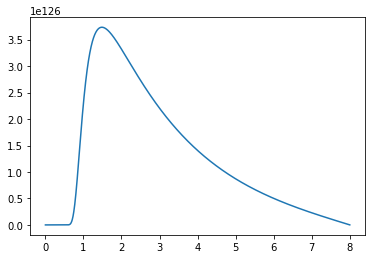

In [266]:
#TRACE LA FONCTION D'ONDE POUR L'ENERGIE E_eval.
E_eval=  -0.09511837783399561
psi_range=np.zeros(int((x_M-x_m)/dx))
psi_range[0] = 0
psi_range[1] = eps
out=numerov(psi_range,x_range,V,E_eval,1)
plt.plot(x_range,out)

1599